# Sheet 10 - Self-Organising Maps

Team name: DataFun
Members:
Fabian Frank
Jan Botsch
David Munkacsi

## 10.1 1d Self-Organizing Map for 2D data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

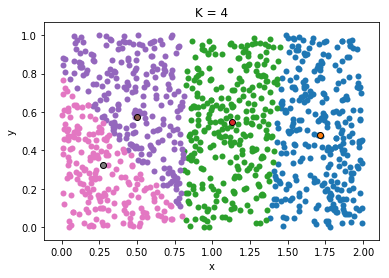

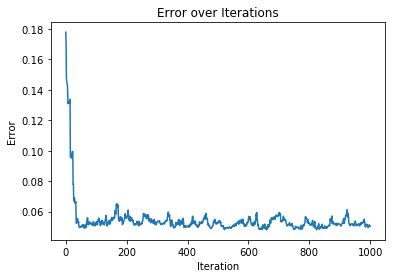

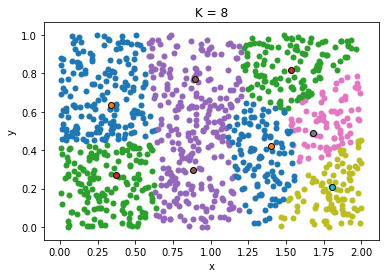

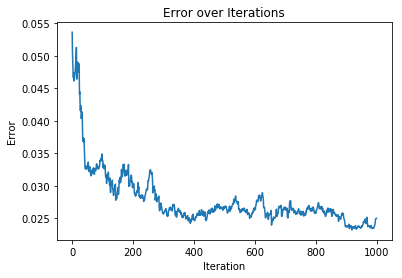

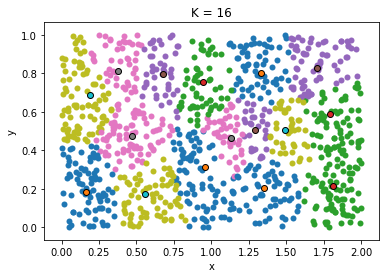

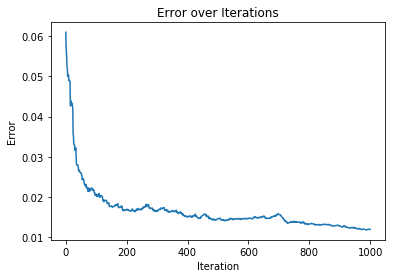

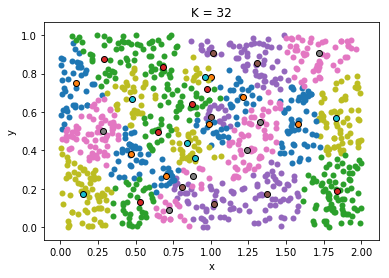

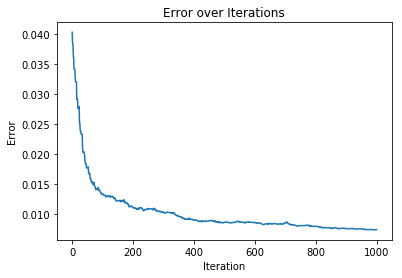

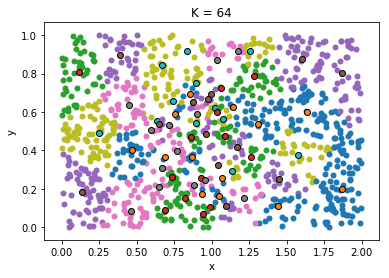

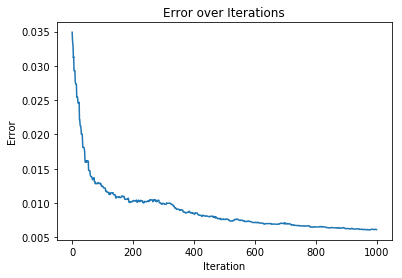

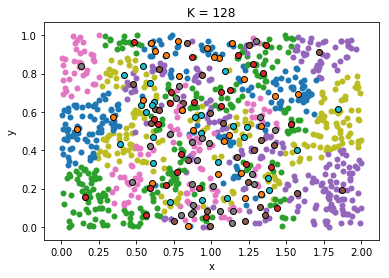

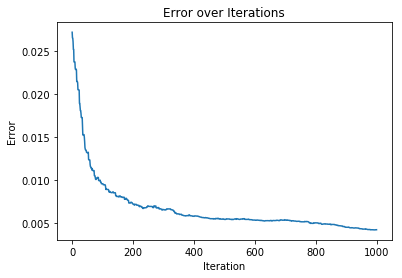

In [2]:
## 10.1 Self-organizing maps 1D

#create random data set
dataSet = np.random.uniform(size=(2,1000))
dataSet[0,:] = dataSet[0,:] * 2.0
dataMean = dataSet.mean(axis=1).reshape((2,1))
p = dataSet.shape[1]

# Init
def init(k):
    wqInit = ((np.random.rand(2,k) - 0.5) + dataMean)
    return wqInit

# Optimization
def assignDatapoint(x, wq):
    diff = x - wq.T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    return mqIdx

def updatePrototypes(wq, x, mqIdx, eps, sig):
    diff = (x.T - wq.T).T
    nbf = calcNeighborhoodFunction(wq,np.arange(float(wq.shape[1])), mqIdx, sig)
    dw = eps * nbf * diff
    wq = wq + dw
    return wq


def calcNeighborhoodFunction(w,q,p,sig):
    diff = q - float(p)
    squ = np.square(diff)
    inp = - squ / (2.0 * sig * sig);
    return np.exp(inp)

def annealParam(eps,tau, tcurr, tmax):
    if t > tmax/4:
        eps = tau * eps
    return eps

def getError(wq):
    mq = assignDatapoints(wq, wq.shape[1])
    #print(mq.shape)
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.square(np.linalg.norm(diff, axis=1))
    tmp = nor[np.nonzero(mq.T)]
    err = (1.0 / (2.0 * p)) * tmp.sum()
    return err


# Optimization
def assignDatapoints(wq, k):
    diff = dataSet[np.newaxis,...] - wq[np.newaxis,...].T
    nor = np.linalg.norm(diff, axis=1)
    mqIdx = np.argmin(nor, axis=0)
    mq = np.zeros((dataSet.shape[1], k))
    rows = list(range(dataSet.shape[1]))
    mq[rows, mqIdx] = 1
    return mq


# Plot dataset
def plot(k, t):
    plt.figure()
    plt.scatter(dataSet[0], dataSet[1])
    plt.scatter(wqInit[0], wqInit[1], color='black')
    plt.scatter(wq[0], wq[1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K = %d' % k + ', Iteration %d' %t)

def plot2(w, dataSet):
    m = assignDatapoints(w, w.shape[1])
    cmap = plt.get_cmap('gnuplot')
    colors = [cmap(i) for i in np.linspace(0.1, 0.9, w.shape[1])]
    plt.figure()
    for i in range(w.shape[1]):
        plt.scatter(dataSet[0,np.nonzero(m[:,i])], dataSet[1,np.nonzero(m[:,i])], linewidth='0')
        plt.scatter(w[0,i], w[1,i], edgecolor='black', linewidth='1')
    #plt.scatter(wq[0], wq[1], color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('K = %d' % w.shape[1])


def plotError(errArr):
    plt.figure()
    plt.plot(errArr)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error over Iterations')



#Init
kArr = [4, 8, 16, 32, 64, 128]
eps = 0.2
tau = 0.9999
sig = 0.5

tmax = p
errArr = np.zeros([tmax+1])
sfdIndices = np.random.permutation(p)



#plot(k, 0)

for k in kArr:
    wqInit = init(k)
    wq = np.copy(wqInit)
    errArr[0] = getError(wq);
    
    for t in range(tmax):
        #assign datapoint to prototype
        idx = assignDatapoint(dataSet[:,sfdIndices[t % p]], wq)
        
        #update prototype locations
        wq = updatePrototypes(wq, dataSet[:,sfdIndices[t % p]], idx, eps, sig)

        #anneal epsilon and sigma
        eps = annealParam(eps, tau, t, tmax)
        sig = annealParam(sig, tau, t, tmax)

        #get the Error
        errArr[t+1] = getError(wq)


    plot2(wq, dataSet)
    plotError(errArr)

plt.show()

## 10.2 1d Self-Organizing Map for 3D data

## 10.3 2d Self-Organizing Map for 3D data

### Visualizing the 3D data

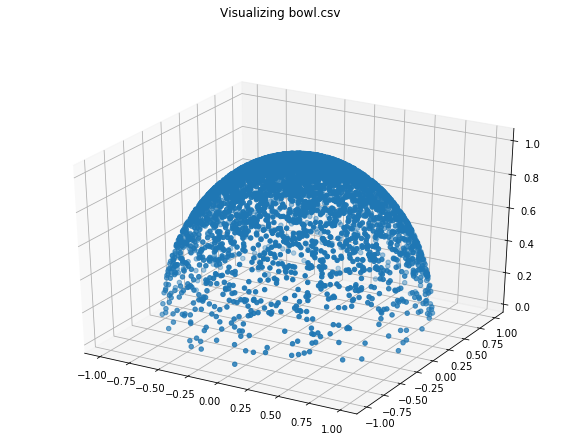

In [3]:
data3D = pd.read_csv("bowl.csv")
data3D = data3D.iloc[:,1:4].values
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = data3D[:,0],ys = data3D[:,1],zs = data3D[:,2])
plt.suptitle("Visualizing bowl.csv")
plt.show()

In [22]:
class SOM3D:
    def __init__(self, k, epsilon, sigma, tau):
        self.k = k*k
        self.epsilon = epsilon
        self.sigma = sigma
        self.tau = tau
    
    def run(self, X, W):
        # Initializing class variables X (data set) and W (initial protos).
        self.W = W
        self.X = X
        # Current index for plotting.
        self.currentIndex = 0
        # Plotting initial state.
        self.plot();
        # Iterating through every data point.
        for alpha in range(X.shape[0]):
            self.currentIndex = alpha;
            if (alpha == X.shape[0]/2):
                self.plot()
            if(alpha > X.shape[0]/4):
                self.epsilon *= self.tau
                
            p = np.argmin([np.linalg.norm(self.X[alpha] - self.W[q]) for q in range(self.k)])
            dw = self.epsilon * np.array([np.exp(-(q-p)**2/(2*self.sigma**2))*(self.X[alpha]-self.W[q]) for q in range(self.k)])
            self.W += dw
        self.plot()
    def plot(self):
        fig = plt.figure(figsize=(10,7))
        plot = fig.add_subplot(111, projection='3d')
        plot.scatter(self.X[:,0], self.X[:,1], self.X[:,2], color='black')
        plot.scatter(self.W[:,0], self.W[:,1], self.W[:,2], color='red')
        plot.set_title('SOM with k=' + str(self.k) + ', sigma=' + str(self.sigma) + ', alpha=' + str(self.currentIndex))
        plot.set_xlabel('X')
        plot.set_ylabel('Y')
        plot.set_zlabel('Z')
        plt.show()

### SOM with 3D data

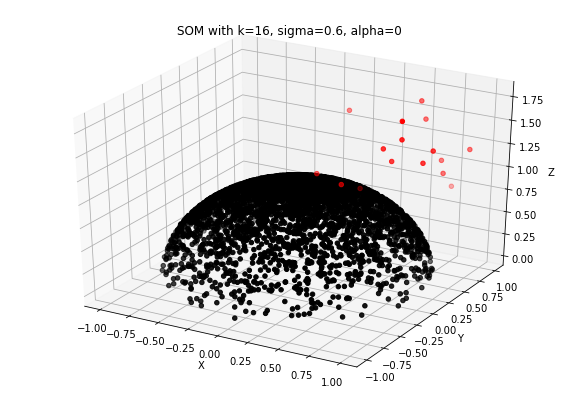

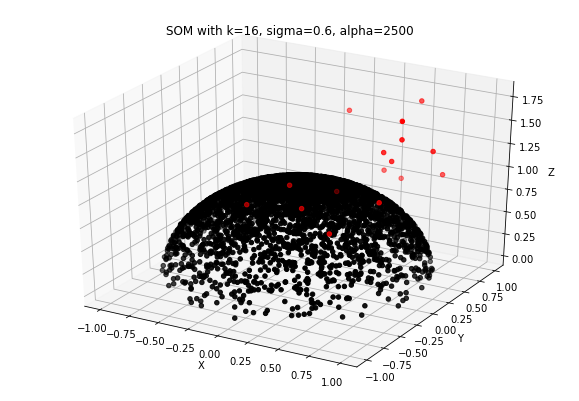

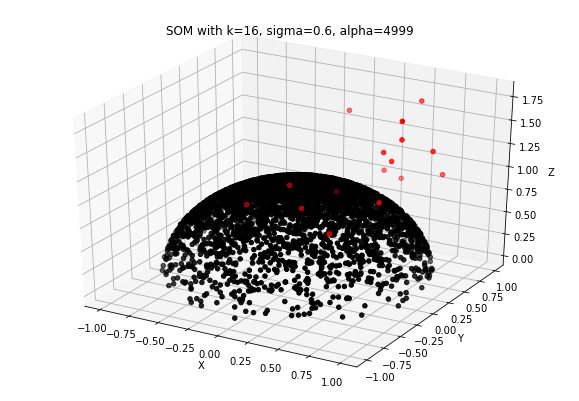

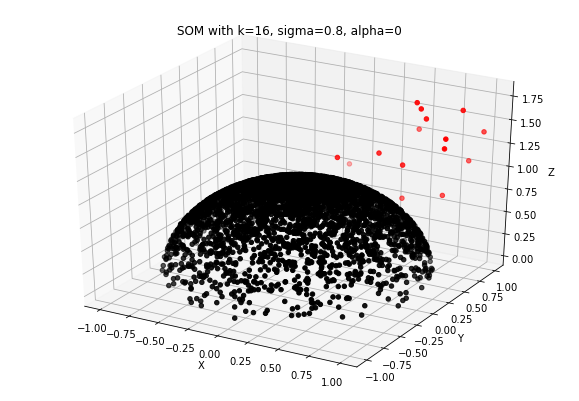

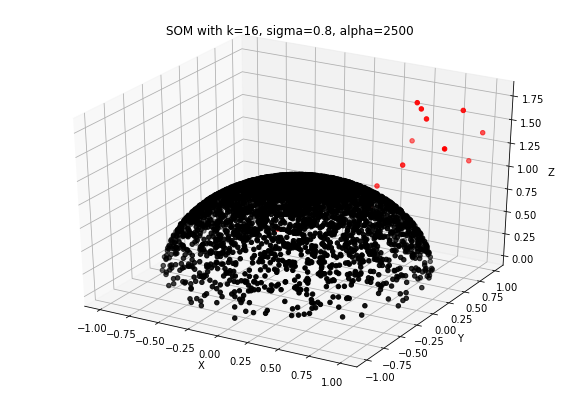

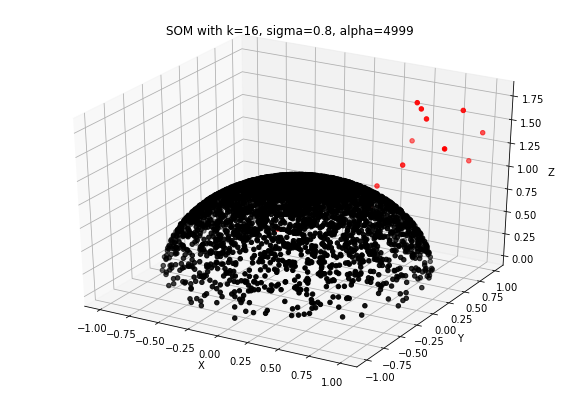

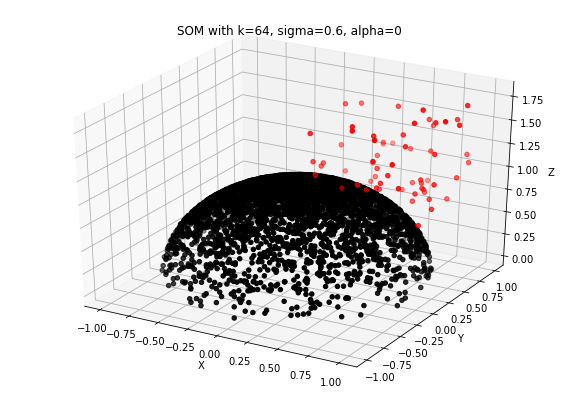

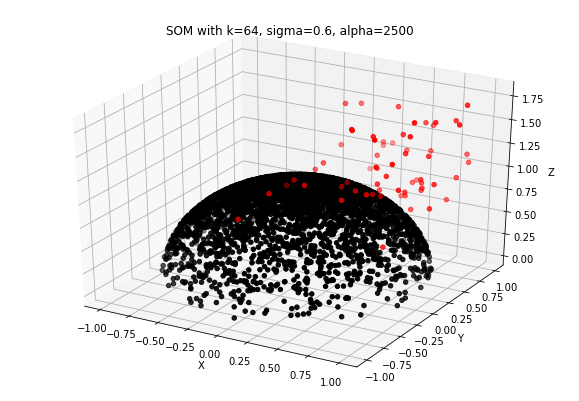

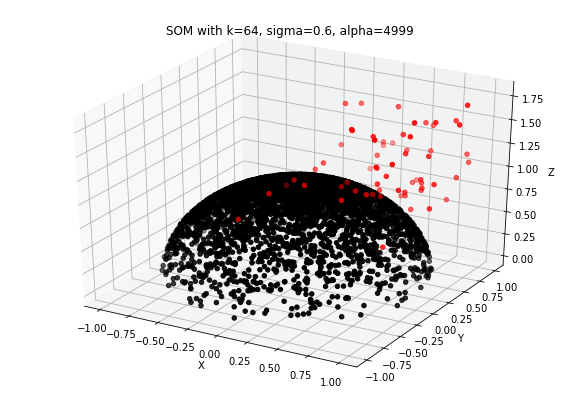

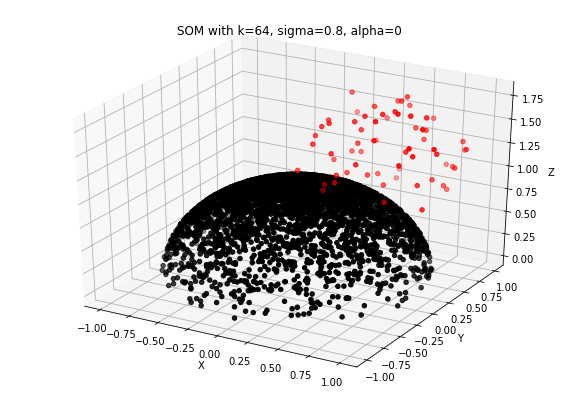

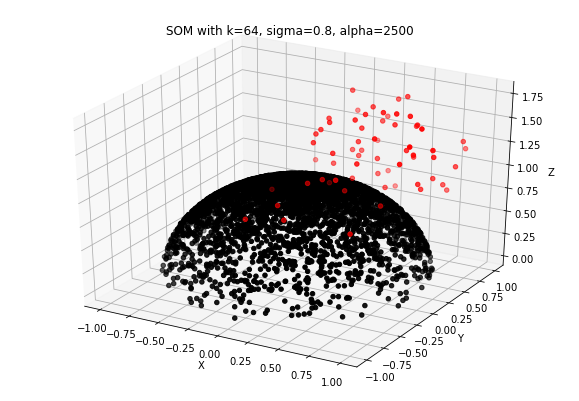

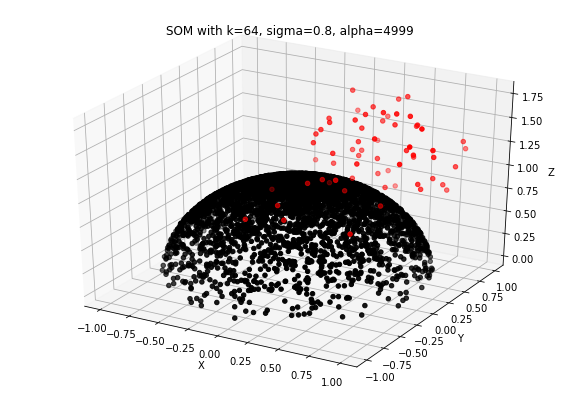

In [23]:
kArray = [4, 8]
sigArray = [0.6, 0.8]

for k in kArray:
    for sigma in sigArray:
        som3D = SOM3D(k=k, sigma=sigma, epsilon=0.01, tau=0.5)
        mean = np.mean(data3D, axis=0)
        W = np.array([mean + np.random.rand(data3D.shape[1]) for _ in range(k*k)])
        som3D.run(data3D, W)